In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [2]:
# Set the global style properties for all plots
sns.set(style="whitegrid")
sns.set_palette("viridis")
plt.rcParams["axes.titleweight"] = "bold"

In [3]:
df = pd.read_csv('../Dataset/Dataset/Training.csv')

In [4]:
df.head()

,Date,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications
0,2009-01-02-00:00:00,2.6568262407789027,Minor,2009,40 ETTL LN UT 24,Two rooms,Condo,Mediocre,760.0,19.0,Scattered,1.025953,6.586707,Greenwich,Condominium,711270.0,975000.0,"In 2009, this condo located in Greenwich at 40..."
1,2009-01-02-00:00:00,5.328727031244374,Basic,2009,18 BAUER RD,Three rooms,Single Family,Superb,7967.337677159014,17.0,Extensive,1.025953,8.224127,East Hampton,Detached House,119970.0,189900.0,"In 2009, this single family located in East Ha..."
2,2009-01-02-00:00:00,4.037758682930219,Basic,2009,48 HIGH VALLEY RD.,Three rooms,Single Family,Satisfactory,982.0,1.0,Accessible,1.025953,8.019369,Ridgefield,Detached House,494530.0,825000.0,"In 2009, this single family located in Ridgefi..."
3,2009-01-02-00:00:00,2.085308997846847,Extensive,2009,56 MERIDEN RD,Three rooms,Single Family,Superb,976.0,5.0,Insufficient,1.025953,6.175522,Old Lyme,Detached House,197600.0,450000.0,"In 2009, this single family located in Old Lym..."
4,02-01-2009-00:00:00,4.397712193695299,Partial,2009,13 CELENTANO DR,Three rooms,Single Family,Below Average,947.0,14.0,Inadequate,NaN,1.677037,Naugatuck,Detached House,105440.0,200000.0,"In 2009, this single family located in Naugatu..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           553952 non-null  object 
 1   crime_rate                     539101 non-null  object 
 2   renovation_level               553952 non-null  object 
 3   Year                           553952 non-null  int64  
 4   Address                        553952 non-null  object 
 5   num_rooms                      553952 non-null  object 
 6   Property                       553952 non-null  object 
 7   amenities_rating               553952 non-null  object 
 8   carpet_area                    550388 non-null  object 
 9   nearby_restaurants             553952 non-null  float64
 10  public_transport_availability  553952 non-null  object 
 11  property_tax_rate              546626 non-null  object 
 12  distance_to_school            

In [6]:
duplicated = df.duplicated().sum()
null_count = df.isnull().sum()

print(f"Duplicated Sum: {duplicated}\n{'-'*25}")
print(f"Null Count:\n{'-'*25}\n{null_count}")

Duplicated Sum: 0
-------------------------
Null Count:
-------------------------
Date                                 0
crime_rate                       14851
renovation_level                     0
Year                                 0
Address                              0
num_rooms                            0
Property                             0
amenities_rating                     0
carpet_area                       3564
nearby_restaurants                   0
public_transport_availability        0
property_tax_rate                 7326
distance_to_school                   0
Locality                             0
Residential                          0
Estimated Value                      0
Sale Price                           0
specifications                       0
dtype: int64


### Date

In [7]:
df.drop(columns=['Date'], inplace=True)

### Crime Rate

In [8]:
df['crime_rate'].describe()

count           539101
unique          531769
top       Not Provided
freq              7333
Name: crime_rate, dtype: object

In [9]:
df['crime_rate'] = pd.to_numeric(df['crime_rate'], errors='coerce')

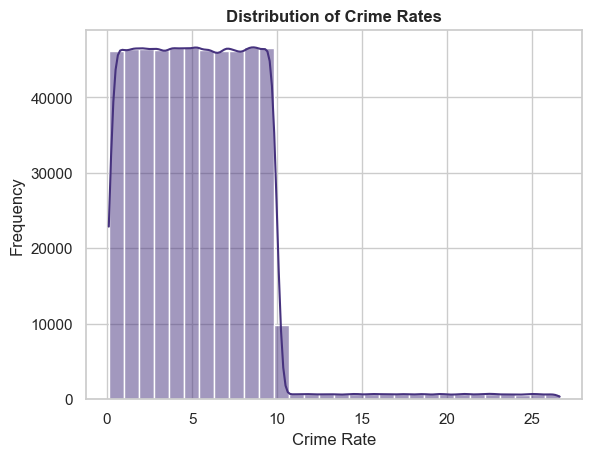

In [10]:
sns.histplot(df['crime_rate'], kde=True, bins=30)

plt.title('Distribution of Crime Rates')

plt.xlabel('Crime Rate')
plt.ylabel('Frequency')

plt.show()

### Renovation Level

In [11]:
renovation_level = df['renovation_level'].value_counts()
renovation_level

renovation_level
Minor        110349
Extensive     82704
Complete      55800
Essential     55757
Advanced      55593
Basic         55563
Standard      55348
Limited       27677
Premium       27611
Partial       27550
Name: count, dtype: int64

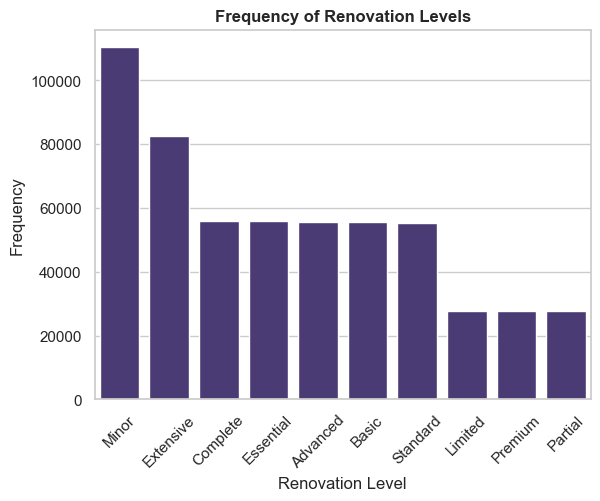

In [12]:
sns.countplot(x='renovation_level', data=df, order=renovation_level.index)

plt.title('Frequency of Renovation Levels')
plt.xlabel('Renovation Level')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.show()

### Year

In [13]:
year = df['Year'].value_counts()
year

Year
2022    57762
2021    48348
2017    44940
2019    44607
2018    43681
2020    43084
2009    40955
2016    38112
2012    35715
2015    34223
2011    33457
2010    30749
2014    29427
2013    28892
Name: count, dtype: int64

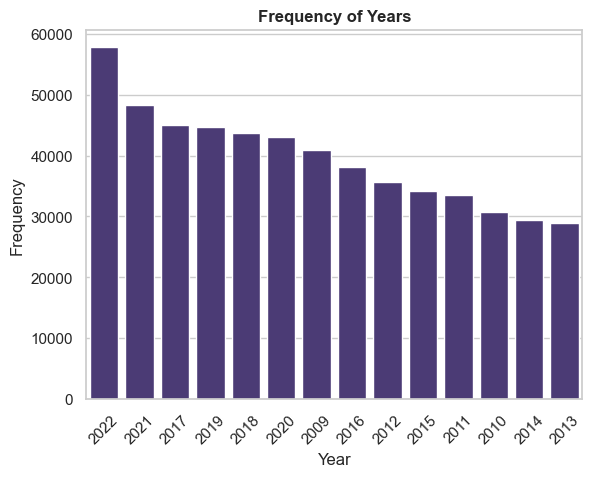

In [14]:
sns.countplot(x='Year', data=df, order=year.index)

plt.title('Frequency of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.show()

### Address

In [15]:
df['Address'].value_counts()

Address
33 NORTH WATER ST    54
POCONO POINT RD      39
71 AIKEN ST          32
WEST KENOSIA AV      30
50 AIKEN ST          19
                     ..
7 MARBLE LANE         1
3 CRAIGMORE RD        1
444 VALLEY ROAD       1
26 SEA BREEZE AVE     1
154 GAYMOOR DRIVE     1
Name: count, Length: 441774, dtype: int64

In [16]:
df.drop(columns=['Address'], inplace=True)

### Rooms

In [17]:
def converter(rooms):
    if rooms == 'Two rooms':
        return 2
    elif rooms == 'Three rooms':
        return 3
    elif rooms == 'Four rooms':
        return 4
    elif rooms == 'Five rooms':
        return 5
    elif rooms == 'Six rooms':
        return 6
    elif rooms == 'Seven rooms':
        return 7
    elif rooms == 'Eight rooms':
        return 8
    elif rooms == 'Nine rooms':
        return 9
    return 0

In [18]:
df['num_rooms'] = df['num_rooms'].apply(converter)

In [19]:
rooms = df['num_rooms'].value_counts()
rooms

num_rooms
3    406463
2    106103
4     26587
6     12625
8      2174
Name: count, dtype: int64

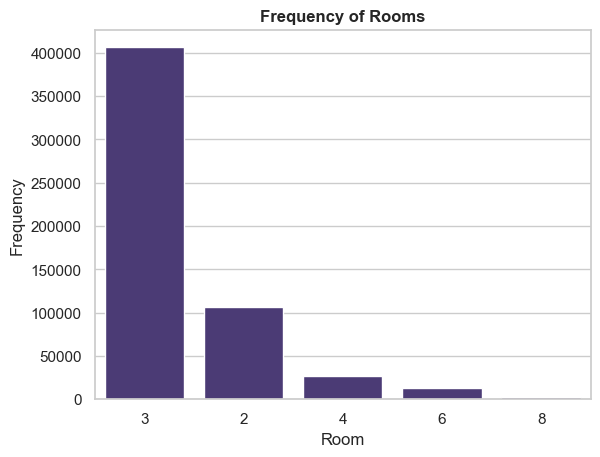

In [20]:
sns.countplot(x='num_rooms', data=df, order=rooms.index)

plt.title('Frequency of Rooms')
plt.xlabel('Room')
plt.ylabel('Frequency')

plt.show()

### Property

In [21]:
property = df['Property'].value_counts()
property

Property
Single Family    394028
Condo            102981
Two Family        25800
Residential       16774
Three Family      12255
Four Family        2114
Name: count, dtype: int64

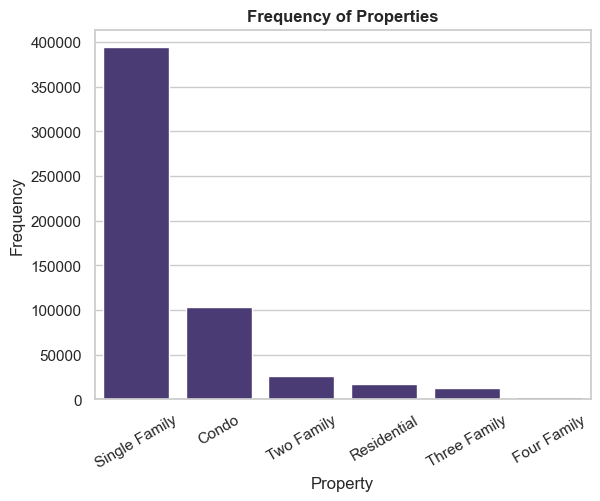

In [22]:
sns.countplot(x='Property', data=df, order=property.index)

plt.title('Frequency of Properties')
plt.xlabel('Property')
plt.ylabel('Frequency')

plt.xticks(rotation=30)

plt.show()

### Amenities Rating

In [23]:
amenities = df['amenities_rating'].value_counts()
amenities

amenities_rating
Outstanding      110984
Superb            83032
Luxurious         55648
Satisfactory      55522
Mediocre          55223
Exceptional       55178
Marginal          55130
Unimpressive      27803
Commonplace       27790
Below Average     27642
Name: count, dtype: int64

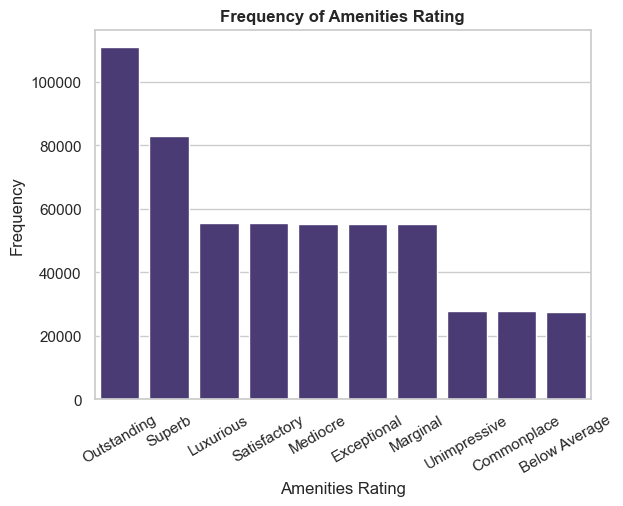

In [24]:
sns.countplot(x='amenities_rating', data=df, order=amenities.index)

plt.title('Frequency of Amenities Rating')
plt.xlabel('Amenities Rating')
plt.ylabel('Frequency')

plt.xticks(rotation=30)

plt.show()

### Carpet Area

In [25]:
df['carpet_area'] = pd.to_numeric(df['carpet_area'], errors='coerce')

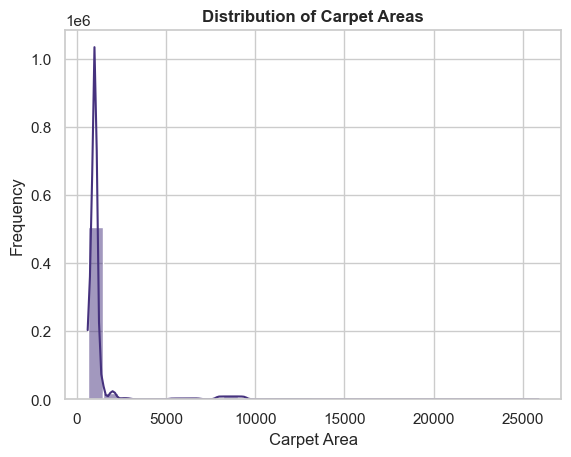

In [26]:
sns.histplot(df['carpet_area'], kde=True, bins=30)

plt.title('Distribution of Carpet Areas')

plt.xlabel('Carpet Area')
plt.ylabel('Frequency')

plt.show()

### Nearby Restaurants

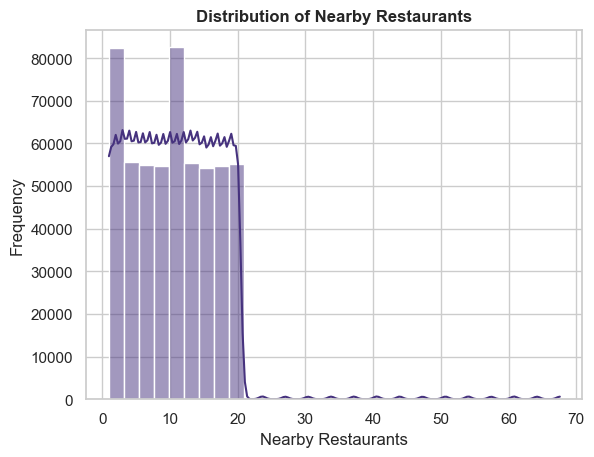

In [27]:
sns.histplot(df['nearby_restaurants'], kde=True, bins=30)

plt.title('Distribution of Nearby Restaurants')

plt.xlabel('Nearby Restaurants')
plt.ylabel('Frequency')

plt.show()

### Public Transport Availability

In [28]:
transport = df['public_transport_availability'].value_counts()
transport

public_transport_availability
Scattered         110785
Abundant           83008
Inadequate         55584
Extensive          55572
Insufficient       55556
Accessible         55517
Well-connected     55103
Limited            27756
Sparse             27678
Patchy             27393
Name: count, dtype: int64

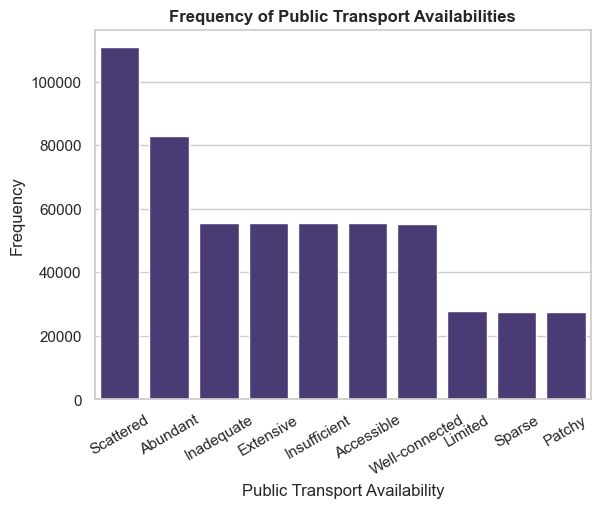

In [29]:
sns.countplot(x='public_transport_availability', data=df, order=transport.index)

plt.title('Frequency of Public Transport Availabilities')
plt.xlabel('Public Transport Availability')
plt.ylabel('Frequency')

plt.xticks(rotation=30)

plt.show()

### Property Tax Rate

In [30]:
df['property_tax_rate'] = pd.to_numeric(df['property_tax_rate'], errors='coerce')

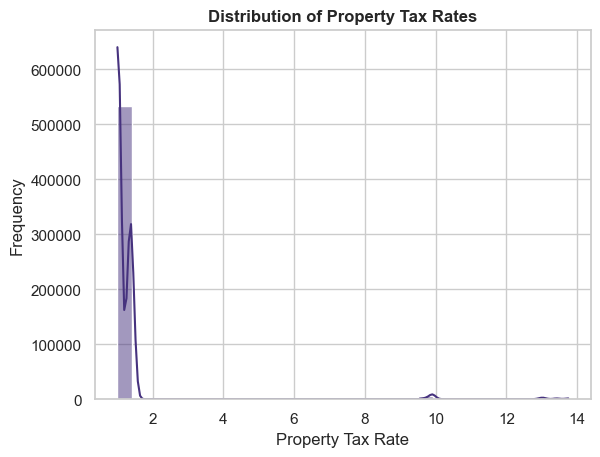

In [31]:
sns.histplot(df['property_tax_rate'], kde=True, bins=30)

plt.title('Distribution of Property Tax Rates')

plt.xlabel('Property Tax Rate')
plt.ylabel('Frequency')

plt.show()

### Distance To School

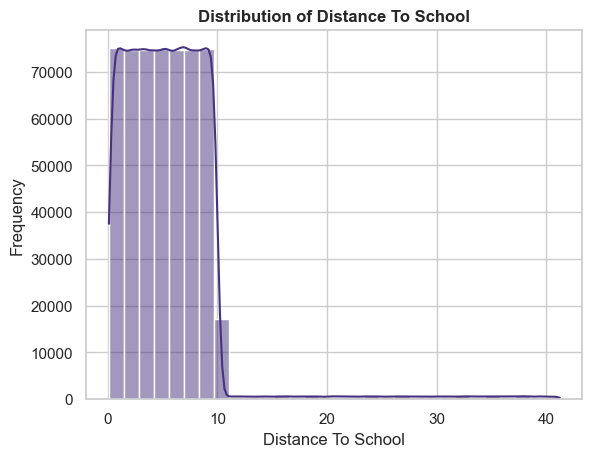

In [32]:
sns.histplot(df['distance_to_school'], kde=True, bins=30)

plt.title('Distribution of Distance To School')

plt.xlabel('Distance To School')
plt.ylabel('Frequency')

plt.show()

### Locality

In [33]:
locality = df['Locality'].value_counts()[:10]
locality

Locality
Bridgeport       17672
Waterbury        15537
Stamford         15341
Norwalk          12800
Fairfield        11118
West Hartford    11111
Greenwich        10767
Danbury          10683
New Haven        10434
Hamden           10025
Name: count, dtype: int64

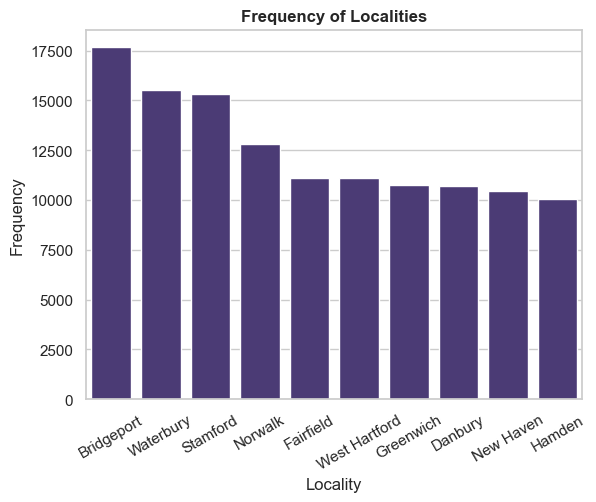

In [34]:
sns.countplot(x='Locality', data=df[df['Locality'].isin(locality.index)], order=locality.index)

plt.title('Frequency of Localities')
plt.xlabel('Locality')
plt.ylabel('Frequency')

plt.xticks(rotation=30)

plt.show()

### Residential

In [35]:
residential = df['Residential'].value_counts()
residential

Residential
Detached House    406463
Condominium       106103
Duplex             26587
Triplex            12625
Fourplex            2174
Name: count, dtype: int64

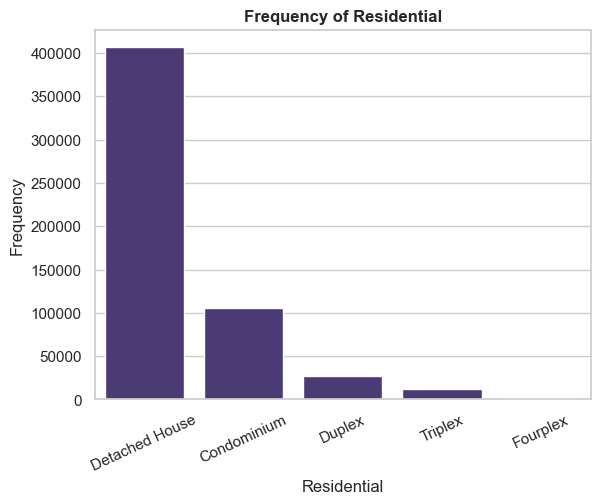

In [36]:
sns.countplot(x='Residential', data=df, order=residential.index)

plt.title('Frequency of Residential')
plt.xlabel('Residential')
plt.ylabel('Frequency')

plt.xticks(rotation=25)

plt.show()

### Estimated Value

In [37]:
df['Estimated Value'].describe()

count    5.539520e+05
mean     3.395377e+05
std      1.829786e+06
min      0.000000e+00
25%      1.131900e+05
50%      1.652000e+05
75%      2.678000e+05
max      8.815100e+08
Name: Estimated Value, dtype: float64

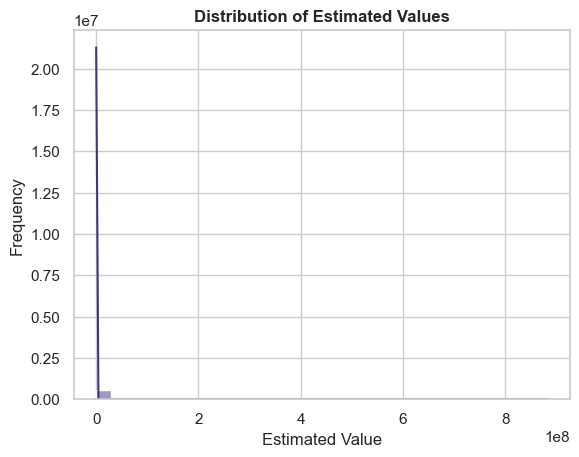

In [38]:
sns.histplot(df['Estimated Value'], kde=True, bins=30)

plt.title('Distribution of Estimated Values')

plt.xlabel('Estimated Value')
plt.ylabel('Frequency')

plt.show()

### Sale Price

In [39]:
df['Sale Price'].describe()

count    5.539520e+05
mean     3.514670e+05
std      6.708937e+05
min      0.000000e+00
25%      1.480000e+05
50%      2.300000e+05
75%      3.647000e+05
max      1.570000e+08
Name: Sale Price, dtype: float64

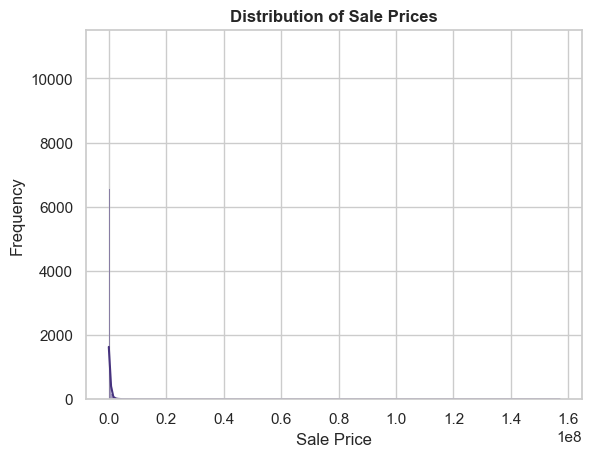

In [40]:
sns.histplot(df['Sale Price'], kde=True)

plt.title('Distribution of Sale Prices')

plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.show()

### Specifications

In [41]:
df['specifications'].head()

0    In 2009, this condo located in Greenwich at 40...
1    In 2009, this single family located in East Ha...
2    In 2009, this single family located in Ridgefi...
3    In 2009, this single family located in Old Lym...
4    In 2009, this single family located in Naugatu...
Name: specifications, dtype: object

In [42]:
df.drop(columns=['specifications'], inplace=True)